# 1-1. AIとは何か？簡単なAIを設計してみよう

AIブームに伴って、様々なメディアでAIや機械学習、深層学習といった言葉が使われています。本章ではAIと機械学習（ML)、深層学習の違いを理解しましょう。

## 人工知能（AI）とは？

そもそも人工知能（AI)とは何でしょうか？

![AI_ML_DNN.png](http://www.hirokinakahara.sakura.ne.jp/ML_Tutorial/fig1-1.png)
Wikipedia[1]によると、人工知能について以下のように書かれています。
人工知能（じんこうちのう、英: artificial intelligence、AI〈エーアイ〉）とは「言語の理解や推論、問題解決などの知的行動を人間に代わってコンピュータに行わせる技術」。

要は知的行動をコンピュータが行う技術のことですね。。もう少し歴史を遡ってみると、過去のコンピュータは日本語で計算機、その言葉通り「計算」をするための機械でした。今で言うと「電卓」そのものですね。つまり、電卓で行う計算
（左の図）ではできない絵の認識や翻訳（右の図）などを知的な処理とし、その処理をコンピュータ、すなわち電卓などの計算機で行うんですね。
つまり、こんな感じでしょうか。↓

![../figure/fig1-2.png](http://www.hirokinakahara.sakura.ne.jp/ML_Tutorial/fig1-2.png)
あれ？と思われるかもしれませんが、現実は皆さんの身の回りのコンピュータが認識や翻訳をやってますよね。コンピュータに脳は入っていません。つまり、脳が行っている「知的な処理」というのをコンピュータが得意な電卓で行う計算に置き換えて処理しているのです。

## 今のコンピュータでできること
![../figure/fig1-3.png](http://www.hirokinakahara.sakura.ne.jp/ML_Tutorial/fig1-3.png)

そもそもコンピュータが得意な処理とは何でしょうか？それは電卓の例でもわかるように、数値の計算です。あと、数値の大小比較も得意です。つまり、数値にしてしまえばコンピュータで色々できそうですね。実際、写真の加工や音声の合成などはそれぞれデータを数値化することでコンピュータが処理できるようにしています。AIも数値を扱う問題に変換してしまえばよさそうですね。


# 簡単なAIを作ってみよう
## ミニトマトを出荷用に収穫するかどうか判定するAI

![../figure/fig1-4.png](http://www.hirokinakahara.sakura.ne.jp/ML_Tutorial/fig1-4.png)
早速AIを作ってみてどんなものか体験してみましょう。ここではミニトマト農家になったつもりで、収穫するかどうかを自動で見分けてくれるAIを作ることにしましょう。

## コンピュータが処理できる数値の計算・比較処理に直す
![../figure/fig1-5.png](http://www.hirokinakahara.sakura.ne.jp/ML_Tutorial/fig1-5.png)
コンピュータは数値の計算と比較が得意なので、数値に直しましょう。例えばトマトの赤みを数値化することは画像処理（後半の章でOpenCVというライブラリを説明します）で比較的簡単にできます。市場価格はスーパーとかでトマトのパックを買って１個当たりの値段を算出すればわりと正確な値段が出ると思います。ここではあくまで私が適当に付けた値段ですが。。
最後に、市場価格から収穫する/しないかどうかを決めます。これは予想した市場価格に対してあらかじめ決めておいた値との比較でできますね。


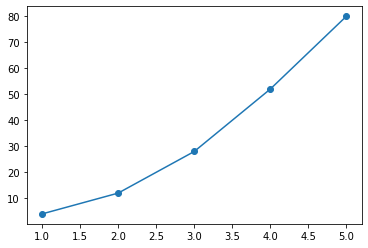

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])
y = np.array([4,12,28,52,80])

plt.plot(x,y, label="tomato", marker="o")

この関係をグラフに書いてみましょう。そうです、この関係を正しく推定できるとミニトマトの収穫を判断するAIができあがるのです！
さて、どうやって推定しましょうか。。

## 直線で近似してみる

学生時代（私は中学生）に習った直線の方程式で推定してみましょう。２次元グラフは任意の２点(x1,y1)-(x2,y2)間を直線で表現できます。
直線による表現→y=ax+b でしたから、先ほどのグラフの数値(x1,y1)=(1,4), (x2,y2)=(5,80)より

傾き: a＝(y2-y1)/(x2-x1)=(80-4)/(5-1)=76/4=19
切片: b＝y-ax=4-19×1=-15

従って y=19x-15 という直線式を得ました。これに間の値を代入してどの程度正しく予測できたかみてみましょう。

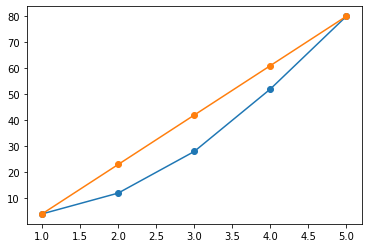

In [10]:
a = 19
b = -15
y_est1 = a * x + b

plt.plot(x,y, label="tomato", marker="o")
plt.plot(x,y_est1, label="estimation", marker="o")

うーん、ダメですね。。両端は上手く予想出来ていますが、その間の誤差が大きそうです。。

## 誤差を最小に抑える

トライアンドエラーで誤差が最も小さくなる直線、すなわち傾きと切片を求めるのは大変そうです。そこで、全ての点の二乗誤差の合計を最小にするようにしましょう。二乗を使うのは正負に影響を受けないようにするためです。まず、傾きaの計算式は

a= Sum of (x-xの平均)*(y-yの平均) / Sum of (x-xの平均)^2  

です。計算してみましょう。

x_mean = (1+2+3+4+5)/5=3

a = 192/10=19.2 と計算できましたね。Jupyter NotebookはPythonプログラミングもできるので、試行錯誤しながらプログラミングするのにとても向いています。

切片bは

b=yの平均 - a×xの平均

です。計算するとb=-22.4です。


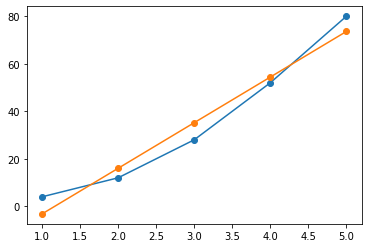

In [13]:
a = 19.2
b = -22.4
y_est2 = a * x + b

plt.plot(x,y, label="tomato", marker="o")
plt.plot(x,y_est2, label="estimation (mean of squared error(MSE))", marker="o")

おお、今度はデータの間をちょうど通る直線が引けましたね！なんとなく実際の市場価格を推定できてそうです。

## 他の近似式では？

するどい！何も直線式で近似する必要はないです。その通りです。２次式・多項式・さらに複雑な式、、色々ありすぎて困りますね。AIの設計は近似式をどうやって決めるかがポイントですがトライアンドエラーをするしかないのが現状です。それに、近似式のいろいろな値（今回は傾きと切片）を決めるのも大変そうですね。。
最近ではクラウド上の計算機を大量に使って力技で探しています。ただ、それでも探す範囲が広すぎるので全自動化はまだ難しいのが現状です。

## これまでのステップは機械学習そのものだった

実はこれまでの一連の作業は機械学習というAIの１分野の手法を使ったのでした。具体的には
色や市場価格を準備する→データを収集する
近似式を決める→モデルを設計する
切片や傾きを求める→学習を行う（ハイパーパラメータを決める）
推定がどれくらい正確かを確認する→モデルの検定を行う
をやっていたのです。最近、機械学習・AIが紛れていましたが、なんとなく両者の関係がわかってきましたでしょうか？AIを設計する＝機械学習で設計する、といっても過言でないくらい今日では機械学習が主流となっています。次回は機械学習をより詳しく説明します。

## 課題

AIを使ったアプリケーション・製品について一つ調査し、レポートを提出してください。

フォーマット：PDF形式（図、文章、参考にした文献（URL)）
提出先：T2Scholar
締め切り： (講義中にアナウンスします)

## 参考文献
[1] https://ja.wikipedia.org/wiki/%E4%BA%BA%E5%B7%A5%E7%9F%A5%E8%83%BD